In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
mpl.rcParams['savefig.dpi'] = 128
mpl.rcParams['figure.dpi'] = 128
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (14, 7))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
mpl.rc('axes', grid = False)
# Set backgound color to white
mpl.rc('axes', facecolor = 'white')

In [2]:
df = pd.read_csv("2009-2017.csv")

In [3]:
df.shape

(268639, 10)

In [4]:
print("Shape of data frame: {}".format(df.shape))
print("Keys of enquiries_dataset: \n{}".format(df.keys()))
print("data ytpes of enquiries_dataset: \n{}".format(df.dtypes))

Shape of data frame: (268639, 10)
Keys of enquiries_dataset: 
Index(['marketing code', 'classification', 'loan amount', 'loan reason',
       'property use', 'enquiry status', 'month', 'day', 'hour', 'weekday'],
      dtype='object')
data ytpes of enquiries_dataset: 
marketing code    object
classification    object
loan amount        int64
loan reason       object
property use      object
enquiry status    object
month              int64
day                int64
hour               int64
weekday            int64
dtype: object


In [5]:
test = df[df['enquiry status'] == 'Rejected']
test.shape

(218370, 10)

In [6]:
test = df[df['enquiry status'] == 'Accepted']
test.shape

(50269, 10)

In [7]:
from sklearn.utils import resample

df_majority = df[df['enquiry status'] == 'Rejected']
df_minority = df[df['enquiry status'] == 'Accepted']


# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=50269,    # to match majority class
                                 random_state=123) # reproducible results



# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled['enquiry status'].value_counts()

Rejected    50269
Accepted    50269
Name: enquiry status, dtype: int64

In [8]:
df = df_downsampled

In [9]:
print("Shape of new data frame: {}".format(df.shape))

Shape of new data frame: (100538, 10)


In [10]:
print("data ytpes of enquiries_dataset: \n{}".format(df.dtypes))

data ytpes of enquiries_dataset: 
marketing code    object
classification    object
loan amount        int64
loan reason       object
property use      object
enquiry status    object
month              int64
day                int64
hour               int64
weekday            int64
dtype: object


In [11]:
target = 'enquiry status';

X = df[df.keys()]
X = df.loc[:,df.columns != target]
y = df[target]

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [13]:
category_column = X.select_dtypes(include='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

transform_dict = {}
for col in category_column.columns:
    le = preprocessing.LabelEncoder()
    X[col] = le.fit_transform(X[col])
    transform_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

{'classification': {'Affiliate': 0,
  'All Homes': 1,
  'Alternative Media': 2,
  'Bloom': 3,
  'Club FS': 4,
  'Coregistration': 5,
  'Direct': 6,
  'Domain': 7,
  'Domain Bonus Display': 8,
  'Domain Campaigns': 9,
  'Domain Campaigns CPA': 10,
  'Domain Campaigns CPL': 11,
  'Domain Competitions': 12,
  'Domain Internal CBA Program': 13,
  'Dynamic Home Loans': 14,
  'Email eChoice Database': 15,
  'External Email': 16,
  'Finder': 17,
  'First Home Buyers': 18,
  'Folio': 19,
  'Google AdWords': 20,
  'Home Hound': 21,
  'Home Sales': 22,
  'Manila': 23,
  'Money Manager': 24,
  'None': 25,
  'Omnilead': 26,
  'On The House': 27,
  'Partners': 28,
  'Phone': 29,
  'Portal Campaigns': 30,
  'Portals': 31,
  'REA': 32,
  'Real Estate View': 33,
  'Referrer': 34,
  'Refinancing AdWords': 35,
  'Refinancing Direct': 36,
  'Refinancing Domain': 37,
  'Remarketing': 38,
  'Retention': 39,
  'SMSF Loans': 40,
  'Self Employed Loans AdWords': 41,
  'Self Employed Loans Direct': 42,
  'Soci

In [18]:
inverse_transform_dict = {}
for col, d in transform_dict.items():
    inverse_transform_dict[col] = {v:k for k, v in d.items()}

{'classification': {0: 'Affiliate',
  1: 'All Homes',
  2: 'Alternative Media',
  3: 'Bloom',
  4: 'Club FS',
  5: 'Coregistration',
  6: 'Direct',
  7: 'Domain',
  8: 'Domain Bonus Display',
  9: 'Domain Campaigns',
  10: 'Domain Campaigns CPA',
  11: 'Domain Campaigns CPL',
  12: 'Domain Competitions',
  13: 'Domain Internal CBA Program',
  14: 'Dynamic Home Loans',
  15: 'Email eChoice Database',
  16: 'External Email',
  17: 'Finder',
  18: 'First Home Buyers',
  19: 'Folio',
  20: 'Google AdWords',
  21: 'Home Hound',
  22: 'Home Sales',
  23: 'Manila',
  24: 'Money Manager',
  25: 'None',
  26: 'Omnilead',
  27: 'On The House',
  28: 'Partners',
  29: 'Phone',
  30: 'Portal Campaigns',
  31: 'Portals',
  32: 'REA',
  33: 'Real Estate View',
  34: 'Referrer',
  35: 'Refinancing AdWords',
  36: 'Refinancing Direct',
  37: 'Refinancing Domain',
  38: 'Remarketing',
  39: 'Retention',
  40: 'SMSF Loans',
  41: 'Self Employed Loans AdWords',
  42: 'Self Employed Loans Direct',
  43: '

In [20]:
X.shape

(100538, 9)

In [21]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [22]:
to_drop

[]

In [23]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size=0.4,
                     random_state=0,
                     stratify=y)

## Selecting Best Models Using Exhaustive Search

In [24]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import linear_model

# # Create logistic regression
# logistic = linear_model.LogisticRegression()

# # Create range of candidate penalty hyperparameter values
# penalty = ['l1', 'l2']

# # Create range of candidate regularization hyperparamet values
# C = np.logspace(0, 4, 10)

# # Create dictionary hyperparameter candidates
# hyperparameters = dict(C=C, penalty=penalty)

# # Create grid search
# gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# # Fit grid search
# best_model = gridsearch.fit(X, y)

In [25]:
# # View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 2.78255940221


## Creating A Baseline Classification Model

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create dummy classifer
# dummy = DummyClassifier(strategy='uniform', random_state=1)
pipe_dummy = make_pipeline(StandardScaler(),
                       DummyClassifier(strategy='uniform', random_state=1))

# "Train" model
pipe_dummy.fit(X_train, y_train)

# Get accuracy score
pipe_dummy.score(X_test, y_test)

0.50096976327829723

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipe_rf = make_pipeline(StandardScaler(),
                        RandomForestClassifier(n_estimators=1000,random_state=1, n_jobs=-1))

pipe_rf.fit(X_train, y_train)
rf_label = pipe_rf.predict(X_test)
print('Test Accuracy: %.3f' % pipe_rf.score(X_test, y_test))

Test Accuracy: 0.763


In [28]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_rf,
#                                                         X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),
#                                                         cv=10,n_jobs=1)
# train_mean = np.mean(train_scores,axis=1)
# train_std = np.std(train_scores, axis=1)      
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)


# plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
# plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
# plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
# plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
# plt.grid()
# plt.xlabel('Number of training samples')
# plt.ylabel('Accuracy')               
# plt.legend(loc='lower right')
# plt.ylim([0.8, 1.0])
# plt.show()

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import cross_validation

scores = cross_validation.cross_val_score(pipe_rf, X, y, cv=5)
print("Random forest cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

print("Random forest")
print(classification_report(y_test, rf_label))

/Users/mluo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Random forest cross_validation: 0.65
Random forest
             precision    recall  f1-score   support

          0       0.73      0.82      0.78     20108
          1       0.80      0.70      0.75     20108

avg / total       0.77      0.76      0.76     40216



In [30]:
prob_y_2 = pipe_rf.predict_proba(X)
prob_y_2 = [p[1] for p in prob_y_2]
print( roc_auc_score(y, prob_y_2) )

0.970637439236


In [31]:
print( np.unique( rf_label ) )

[0 1]


In [32]:
# from sklearn.ensemble import RandomForestClassifier

# from sklearn import metrics

# # rescale data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# rfc = RandomForestClassifier(n_estimators=500,random_state=1)
# rfc.fit(X_train_scaled, y_train)
# pred_forest = rfc.predict(X_test)

# print("Test score: {:.2f}".format(rfc.score(X_test_scaled, y_test)))


[learning_curve] Training set sizes: [ 5428 10857 16286 21715 27144 32572 38001 43430 48859 54288]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 78.0min finished


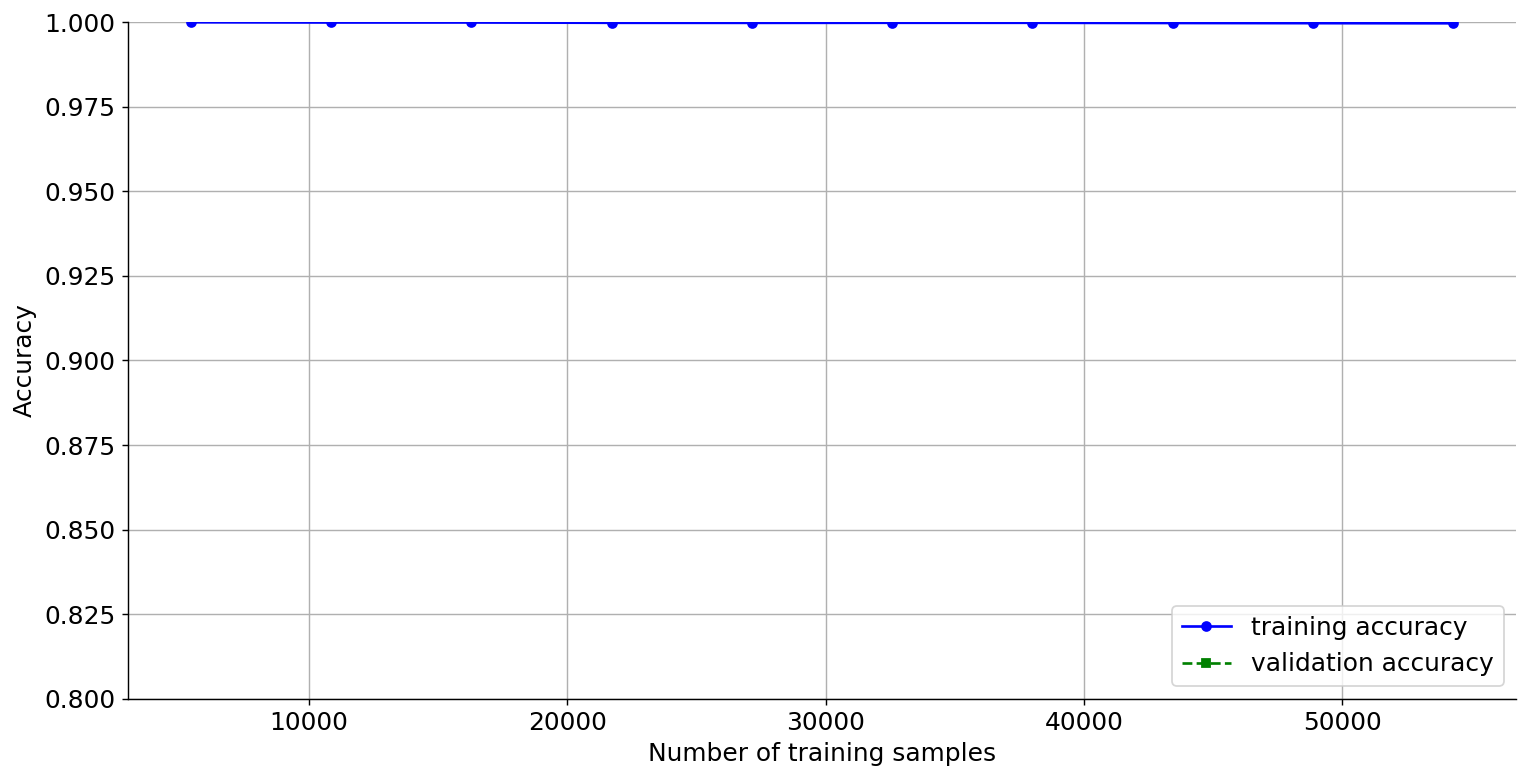

In [33]:
# from sklearn.model_selection import learning_curve
# train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_rf,
#                                                         X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),
#                                                         cv=10,n_jobs=1,
#                                                        verbose=1)
# train_mean = np.mean(train_scores,axis=1)
# train_std = np.std(train_scores, axis=1)      
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)


# plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
# plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
# plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
# plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
# plt.grid()
# plt.xlabel('Number of training samples')
# plt.ylabel('Accuracy')               
# plt.legend(loc='lower right')
# plt.ylim([0.8, 1.0])
# plt.show()

In [34]:
# plt.savefig('myfig.png')

In [35]:
classifer = pipe_rf.steps[1]

In [36]:
feat_labels = X.columns[0:]
importances = pipe_rf.steps[1][1].feature_importances_

# reverse the list
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))
    
# plt.title('Feature Importance')
# plt.bar(range(X_train.shape[1]),importances[indices],align='center')
# plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# plt.tight_layout()
# plt.show()

 1) loan amount                    0.343449
 2) day                            0.123823
 3) marketing code                 0.116822
 4) hour                           0.114857
 5) month                          0.087808
 6) weekday                        0.067269
 7) loan reason                    0.061944
 8) classification                 0.055174
 9) property use                   0.028853


In [37]:
# classifer.oob_score_

In [38]:
# import pickle
# import os

# dest = os.path.join('movieclassifier', 'pkl_objects')
# if not os.path.exists(dest):
#     os.makedirs(dest)

# pickle.dump(stop,open(os.path.join(dest, 'stopwords.pkl'),'wb'),protocol=4)
# pickle.dump(clf,
            
# from sklearn.externals import joblib
# joblib.dump(pipe_rf, 'app/models/classifier.pkl')

In [39]:
from sklearn.externals import joblib
joblib.dump(pipe_rf, 'app/models/classifier.pkl')

['app/models/classifier.pkl']

In [40]:
model_columns = list(X.columns)
joblib.dump(model_columns, 'app/models/model_columns.pkl')

['app/models/model_columns.pkl']

In [41]:
joblib.dump(transform_dict, 'app/models/transform_dict.pkl')

['app/models/transform_dict.pkl']

In [106]:
clf = joblib.load('app/models/classifier.pkl')
model_columns = joblib.load('app/models/model_columns.pkl')
encoder = joblib.load('app/models/encoder.pkl')

In [93]:
import json
my_json_string = json.dumps({
    "classification": "REA",
    "marketing_code": "OME",
    "enquired":"29/5/15 17:10",
    "loan amount": "2010000",
    "property_use": "Residence",
    "loan_reason": "Refinance"
})
my_json_string

'{"classification": "REA", "marketing_code": "OME", "enquired": "29/5/15 17:10", "loan amount": "2010000", "property_use": "Residence", "loan_reason": "Refinance"}'

In [94]:
# test = pd.read_json(my_json_string, orient='index')
# data = pd.read_json(my_json_string, typ='series',orient='index')
# data = pd.DataFrame(data=data)
data = json.loads(my_json_string)
data = pd.DataFrame(data,index=[0])

In [95]:
def transform_cols(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace('_', ' ')
    return df

In [96]:
transform_cols(data)

,classification,enquired,loan amount,loan reason,marketing code,property use
0,REA,29/5/15 17:10,2010000,Refinance,OME,Residence


In [97]:
def transform(df): 
    df['loan amount'] = df['loan amount'].astype('float')
    df['enquired'] = pd.DatetimeIndex(df['enquired'])
    df['month'] = df['enquired'].dt.month
    df['day'] = df['enquired'].dt.day
    df['hour'] = df['enquired'].dt.hour
    df['weekday'] = df['enquired'].dt.dayofweek
    
    if 'post code' in df.columns: 
        df['post code'] = df['post code'].astype('int')
    
    if 'enquired'in df.columns:
        df.drop(['enquired'], axis = 1, inplace = True)
    
    return df.replace(encoder)

In [98]:
data = transform(data)

,classification,loan amount,loan reason,marketing code,property use,month,day,hour,weekday
0,REA,2010000.0,Refinance,OME,Residence,5,29,17,4


In [101]:
def cleanFeatures(data) :
    for col in model_columns: 
        if col not in data.columns:
            data[col] = 0

#  test any error column in test data
for col in data.columns: 
    if col not in model_columns:
        data.drop(col, axis = 1, inplace = True)

In [102]:
# cleanFeatures(data)
data

,classification,loan amount,loan reason,marketing code,property use,month,day,hour,weekday
0,32,2010000.0,4,924,2,5,29,17,4


In [103]:
prediction = clf.predict(data)

In [104]:
prediction

array([1])

In [105]:
print("posibility is: {}".format(np.max(clf.predict_proba(data))))

posibility is: 0.546


In [68]:
data = test.loc[:,test.columns != target]

In [69]:
data = transform(data)

In [70]:
# data = pd.get_dummies(data)

In [71]:
# cleanFeatures(data)

In [72]:
data.shape

(50269, 9)

In [73]:
model_columns

['marketing code',
 'classification',
 'loan amount',
 'loan reason',
 'property use',
 'month',
 'day',
 'hour',
 'weekday']

In [74]:
prediction = clf.predict(data)

In [75]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
proba = []
result = clf.predict_proba(data)
for row in range(len(result)):
    proba.append(np.max(result[row]))

In [77]:
data = test.loc[:,test.columns != target]

In [78]:
data["prediction"] = prediction
data["re"] = proba

In [79]:
data[data['prediction'] == 1]

,marketing code,classification,loan amount,loan reason,property use,month,day,hour,weekday,prediction,re
31,OME,Direct,340000,First HomeBuyer,Residence,12,5,17,2,1,0.635000
41,OME,Direct,260000,Buying Again,Residence,12,30,13,6,1,0.592000
243,A9145,Affiliate,288000,Refinance,Residence,3,25,14,0,1,0.674000
282,OME,Direct,300700,First HomeBuyer,Residence,3,27,7,2,1,0.638857
319,A6132,Google AdWords,160000,Buying Again,Residence,3,27,17,2,1,0.564000
500,OME,Direct,246000,Buying Again,Residence,4,1,15,0,1,0.528000
568,A9000,Email eChoice Database,450000,First HomeBuyer,Residence,4,2,18,1,1,0.557000
578,A9000,Email eChoice Database,285000,Buying Again,Investment,4,2,19,1,1,0.539000
587,A9156,REA,605000,Buying Again,Residence,4,2,22,1,1,0.623000
605,A9000,Email eChoice Database,510000,Buying Again,Residence,4,3,10,2,1,0.669000
